In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

data=pd.read_csv("train.csv",index_col="Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.shape

(1460, 80)

In [3]:
data.shape
target = data['SalePrice']
missing = target.isnull().sum()
print(f"Target 缺失值数量: {missing}")#查看是否存在缺失值
data=data.dropna(subset=['SalePrice'])#扔掉缺失的数据行
data.shape

Target 缺失值数量: 0


(1460, 80)

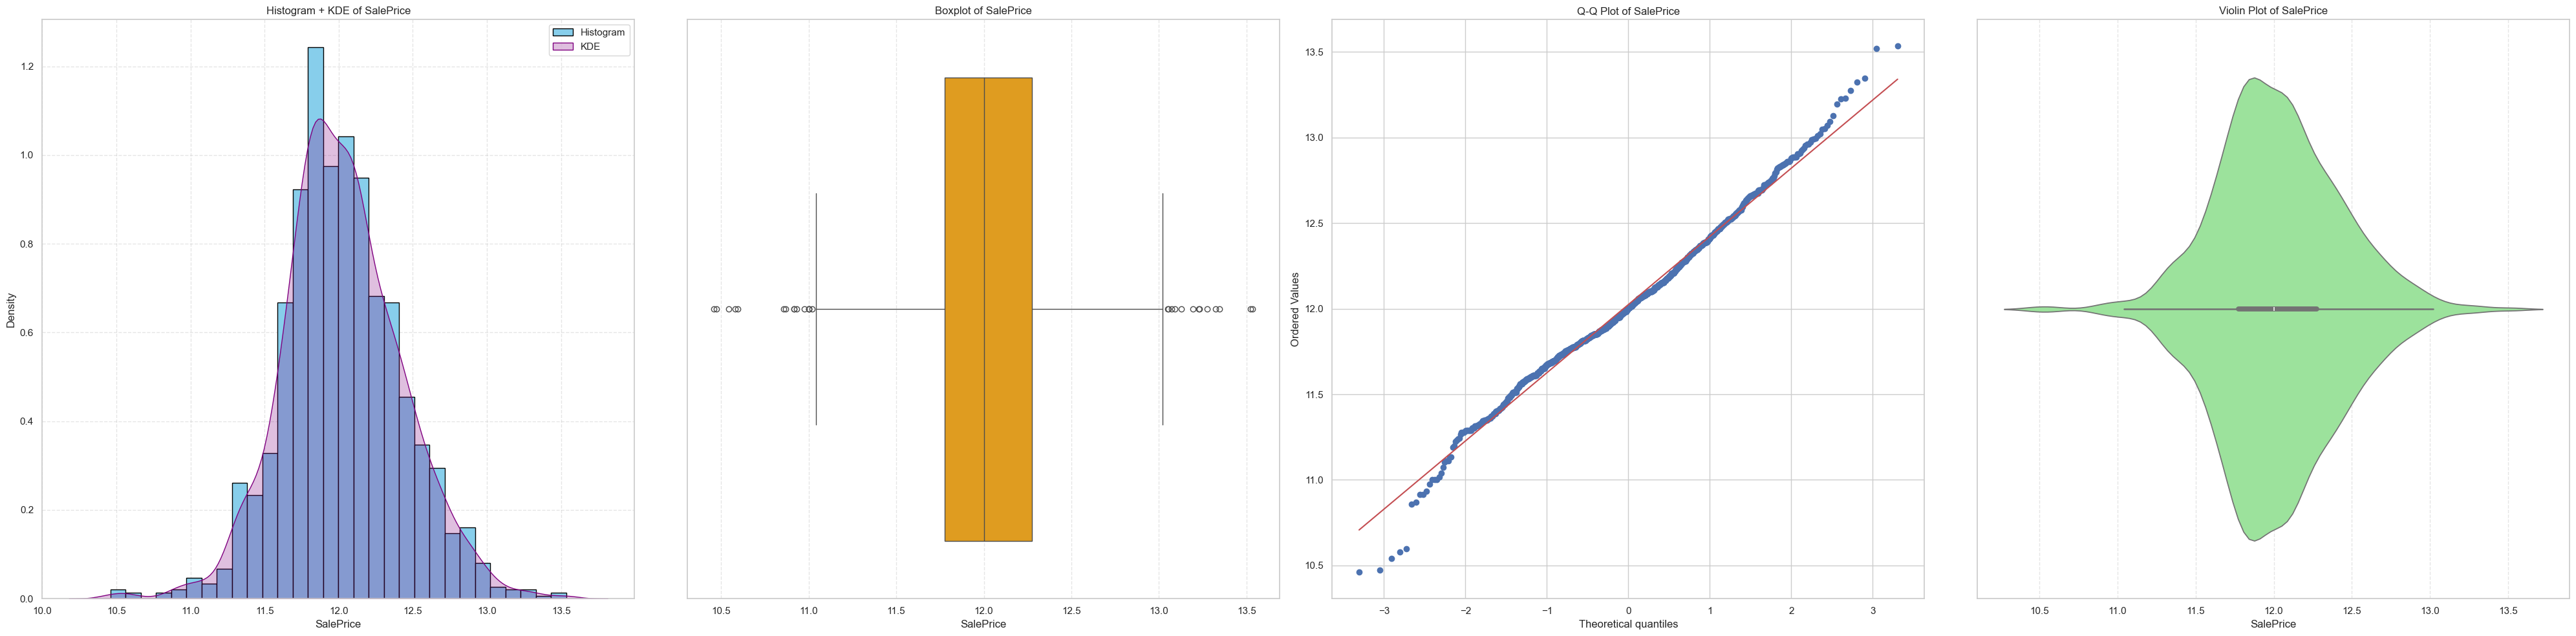

Mean: 12.02
Median: 12.00
Std Dev: 0.40
Variance: 0.16


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


plt.figure(figsize=(40, 10))  # 一行4张图

# 📊+📈 1. Histogram + KDE
plt.subplot(1, 4, 1)
plt.hist(target, bins=30, color='skyblue', edgecolor='black', density=True, label='Histogram')
sns.kdeplot(target, fill=True, color='purple', label='KDE')
plt.title('Histogram + KDE of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 📦 2. Boxplot
plt.subplot(1, 4, 2)
sns.boxplot(x=target, color='orange')
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# 🔍 3. Q-Q Plot
plt.subplot(1, 4, 3)
stats.probplot(target, dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice')

# 🎻 4. Violin Plot
plt.subplot(1, 4, 4)
sns.violinplot(x=target, color='lightgreen')
plt.title('Violin Plot of SalePrice')
plt.xlabel('SalePrice')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

mean = target.mean()
median = target.median()
std = target.std()
var = target.var()

#均值 ≈ 中位数，偏度 ≈ 0：可能是正态分布
#方差很大且右尾重：可能是右偏
#均值远离中位数：可能是非对称分布
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Std Dev: {std:.2f}")
print(f"Variance: {var:.2f}")


In [5]:
#偏度（Skewness）：衡量分布的对称性
#偏度 ≈ 0：近似对称（如正态分布）
#偏度 > 0：右偏，大量小值，少量极大值（比如房价）
#偏度 < 0：左偏，大量大值，少量极小值
print("Skewness: %f" % target.skew())
#峰度（Kurtosis）：衡量分布的尖峭程度
#峰度 ≈ 3：正态分布（中等尖峭）
#峰度 > 3：尖峰重尾（heavy-tailed），可能含异常值
#峰度 < 3：扁平轻尾（light-tailed），更均匀
print("Kurtosis: %f" % target.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


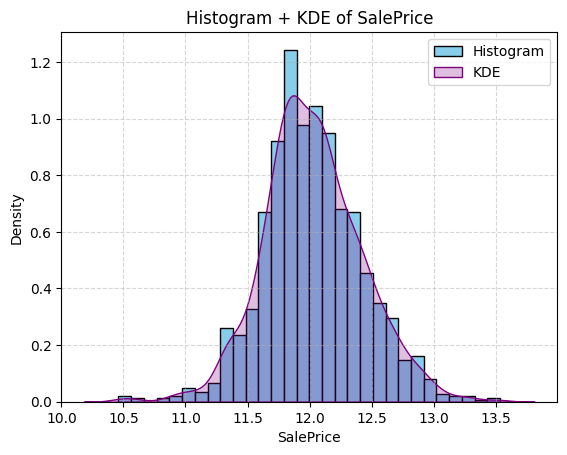

In [6]:
#判断为右偏因此需要对target进行log取值
import numpy as np
target=np.log1p(target)
plt.hist(target, bins=30, color='skyblue', edgecolor='black', density=True, label='Histogram')
sns.kdeplot(target, fill=True, color='purple', label='KDE')
plt.title('Histogram + KDE of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [21]:
mean = target.mean()
std = target.std()

upper_threshold = mean + 3 * std
lower_threshold = mean - 3 * std

print("均值：", mean)
print("标准差：", std)
print("Z-score = 3 的上界阈值：", upper_threshold)
print("Z-score = -3 的下界阈值：", lower_threshold)

均值： 12.024057394918406
标准差： 0.3994492733225068
Z-score = 3 的上界阈值： 13.222405214885926
Z-score = -3 的下界阈值： 10.825709574950887


In [8]:
#去掉异常值
import numpy as np
from sklearn.preprocessing import StandardScaler

X = data[['SalePrice']].values  # 注意要二维数组
print(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 计算 Z-Score

# 取绝对值
z_scores = np.abs(X_scaled).flatten()

# 过滤 Z-Score 小于 3 的数据
df_clean = data[z_scores < 3]

print(f"原始数据量: {data.shape[0]}, 过滤后数据量: {df_clean.shape[0]}")

[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]
原始数据量: 1460, 过滤后数据量: 1438



📊 数值型特征与 SalePrice 的 Pearson 相关性：
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


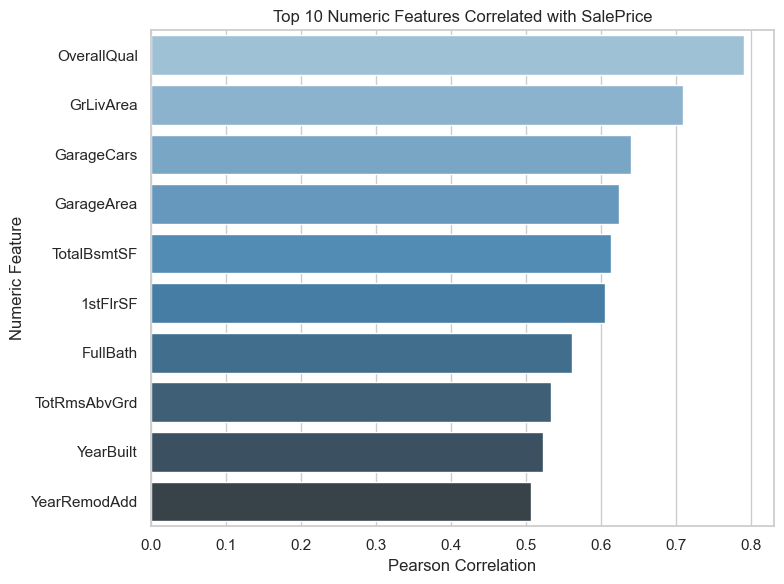


📊 分类特征与 SalePrice 的 Spearman 相关性：
HouseStyle     0.053751
Functional    -0.049621
BsmtCond      -0.040032
Electrical     0.033294
MSZoning       0.033119
MiscFeature   -0.031934
Heating       -0.031575
BsmtQual      -0.030464
GarageType     0.030173
Alley         -0.027117
dtype: float64


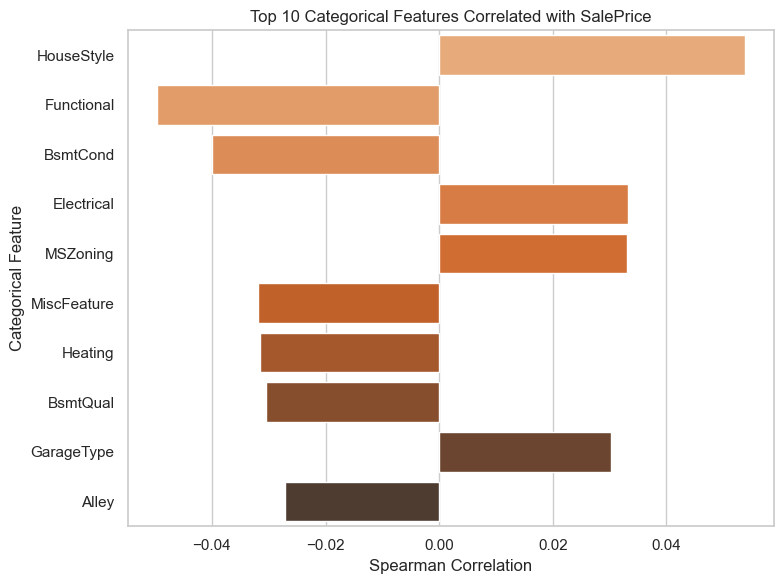

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def explore_numeric_and_categorical_correlations(df, target='SalePrice', top_n=10):
    """
    分别分析数值型和分类特征与目标变量的相关性，并绘制各自前 top_n 个特征的条形图。
    """
    sns.set(style="whitegrid")

    # ============ 数值型特征相关性 (Pearson) ============
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if target in numeric_cols:
        numeric_cols.remove(target)
    numeric_corr = df[numeric_cols + [target]].corr()[target].drop(target)
    top_numeric_corr = numeric_corr.dropna().sort_values(key=abs, ascending=False).head(top_n)

    # 输出
    print(f"\n📊 数值型特征与 {target} 的 Pearson 相关性：")
    print(top_numeric_corr)

    # 绘图
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_numeric_corr.values, y=top_numeric_corr.index, palette="Blues_d")
    plt.title(f"Top {top_n} Numeric Features Correlated with {target}")
    plt.xlabel("Pearson Correlation")
    plt.ylabel("Numeric Feature")
    plt.tight_layout()
    plt.show()

    # ============ 分类特征相关性 (LabelEncoder + Spearman) ============
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_corr = {}
    for col in cat_cols:
        le = LabelEncoder()
        try:
            labels = le.fit_transform(df[col].astype(str))
            corr = pd.Series(labels).corr(df[target], method='spearman')
            cat_corr[col] = corr
        except:
            continue
    cat_corr = pd.Series(cat_corr).dropna()
    top_cat_corr = cat_corr.sort_values(key=abs, ascending=False).head(top_n)

    # 输出
    print(f"\n📊 分类特征与 {target} 的 Spearman 相关性：")
    print(top_cat_corr)

    # 绘图
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_cat_corr.values, y=top_cat_corr.index, palette="Oranges_d")
    plt.title(f"Top {top_n} Categorical Features Correlated with {target}")
    plt.xlabel("Spearman Correlation")
    plt.ylabel("Categorical Feature")
    plt.tight_layout()
    plt.show()

    return top_numeric_corr, top_cat_corr

# 🎉 使用示例
top_numeric_corr, top_cat_corr = explore_numeric_and_categorical_correlations(data, target='SalePrice', top_n=10)

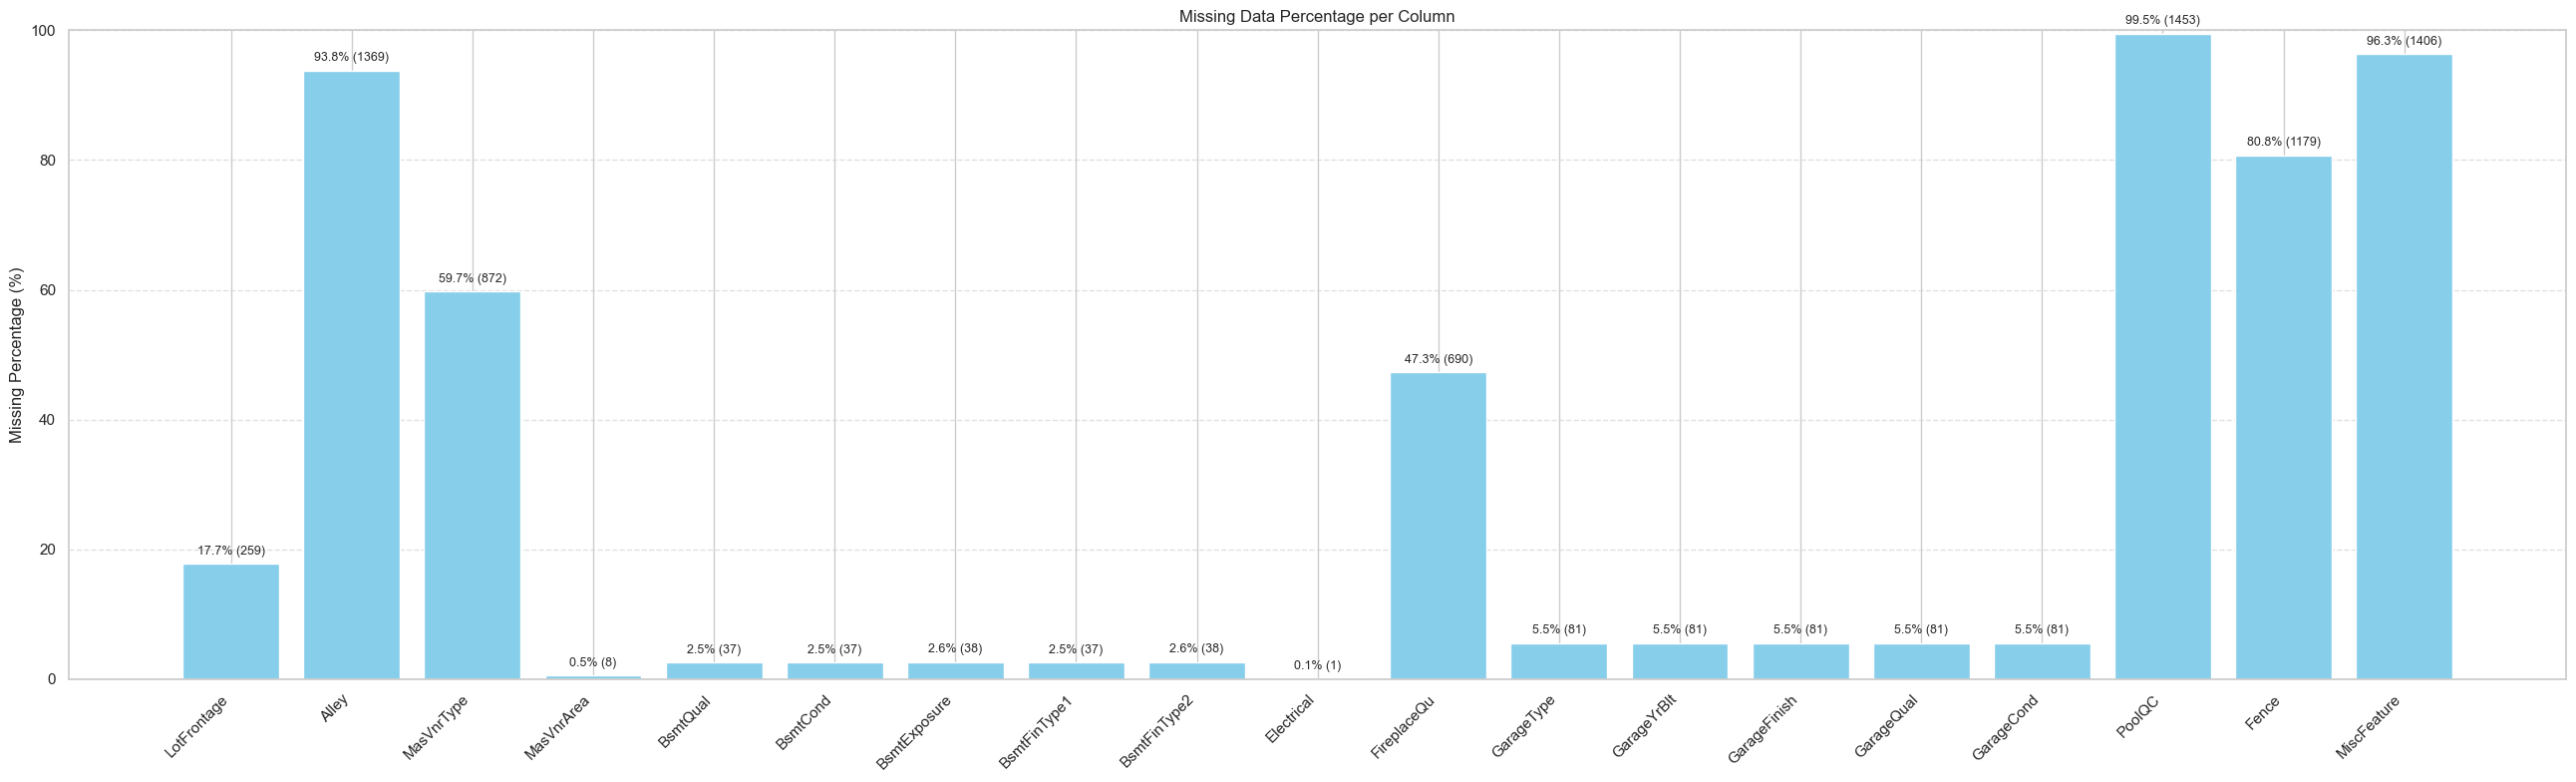

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你的 DataFrame 是 df
# 示例：计算缺失百分比和缺失个数（仅显示有缺失的列）
missing_count = data.isnull().sum()
missing_percent = data.isnull().mean() * 100

missing_info = pd.DataFrame({
    'MissingCount': missing_count,
    'MissingPercent': missing_percent
})
missing_info = missing_info[missing_info['MissingCount'] > 0]  # 仅保留有缺失的列

# 绘图
plt.figure(figsize=(26, 8))
bars = plt.bar(missing_info.index, missing_info['MissingPercent'], color='skyblue')

# 添加标签：百分比 + 缺失个数
for bar, (pct, cnt) in zip(bars, zip(missing_info['MissingPercent'], missing_info['MissingCount'])):
    height = bar.get_height()
    label = f"{pct:.1f}% ({cnt})"
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             label, ha='center', va='bottom', fontsize=9)

# 图表设置
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Data Percentage per Column")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, min(100, missing_info['MissingPercent'].max() + 10))  # 上限稍微高一点
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


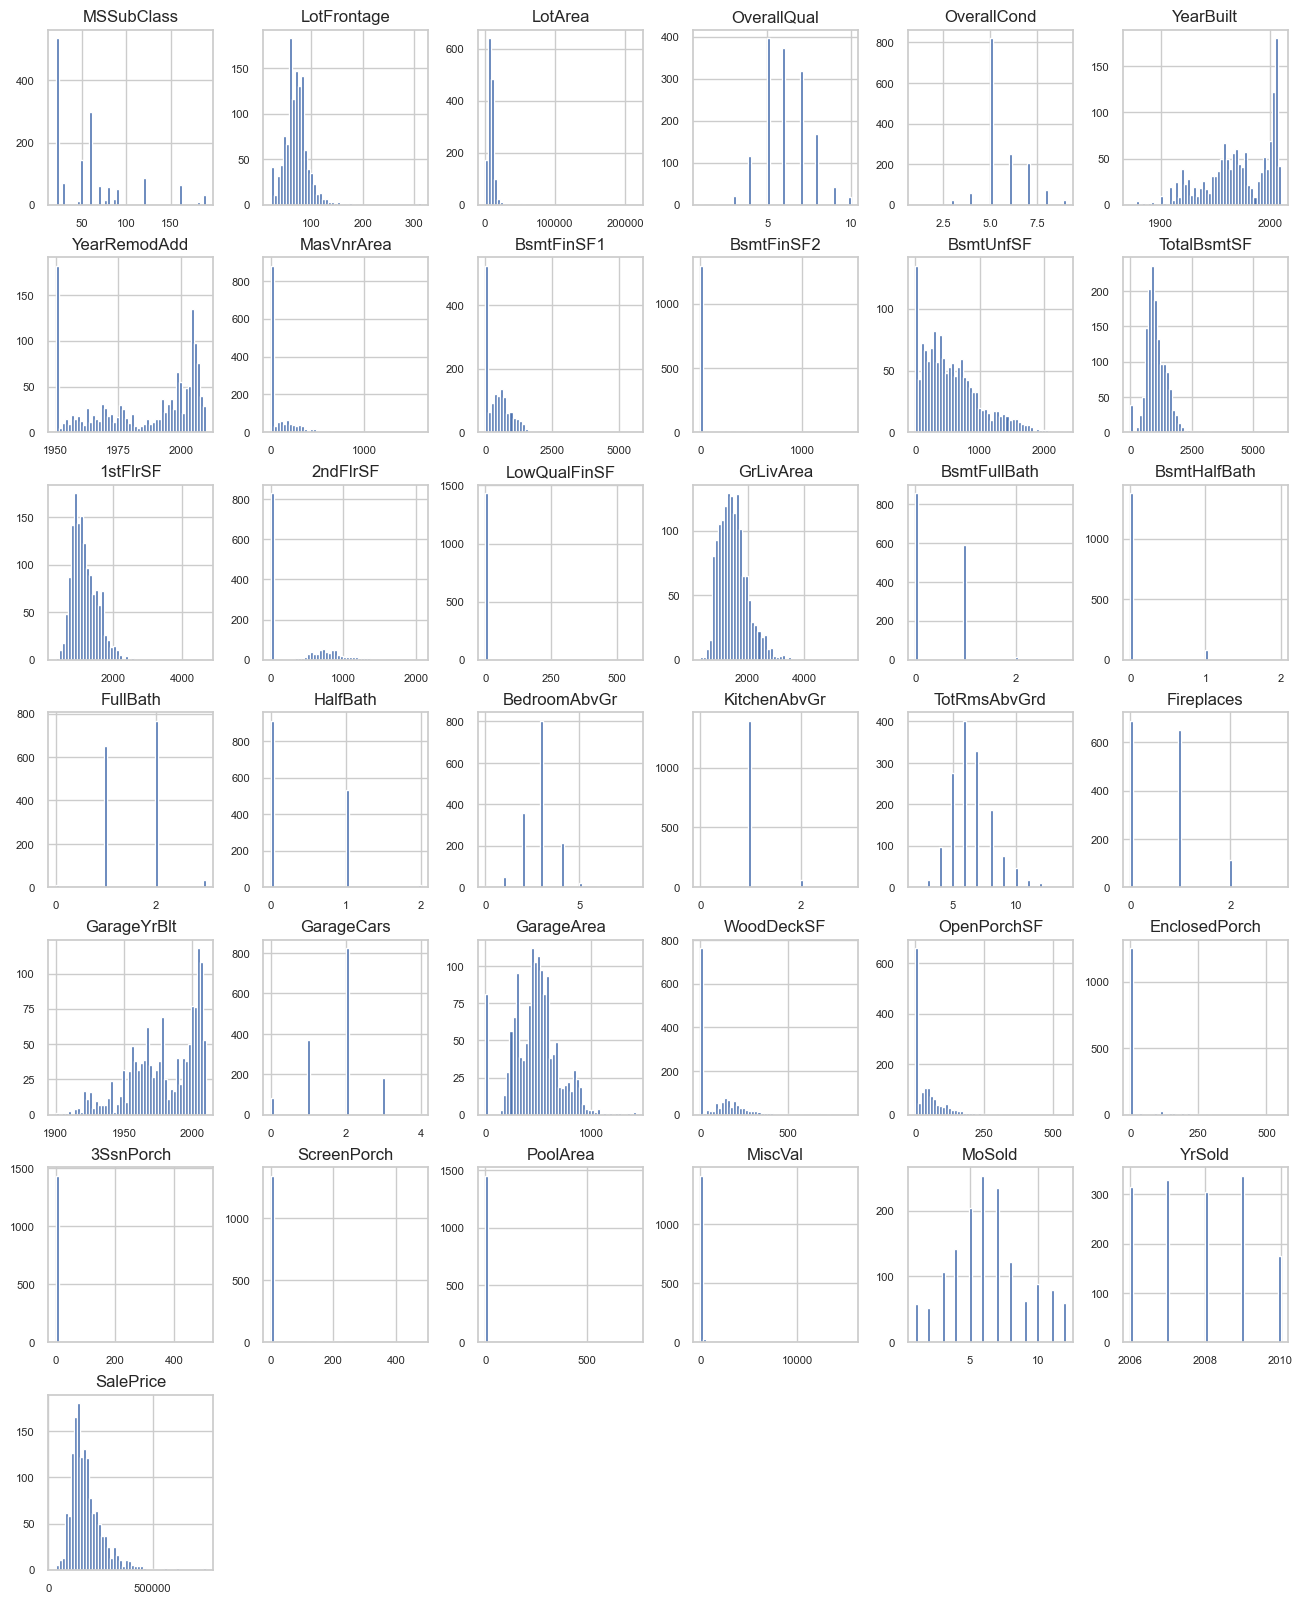

In [10]:
#取出所有数据列然后查看数据分布情况
df_num = data.select_dtypes(include=[np.number])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [85]:
#查看每一列包含缺失值的数量
print(data.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [86]:
data.shape

(1460, 80)

In [87]:
data.isnull().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [88]:
# 仅保留缺失比例 <= 30% 的列
data_clean = data.loc[:, data.isnull().mean() <= 0.3]
data_clean.shape

(1460, 74)

In [89]:
# 计算每行缺失比例
row_missing_ratio = data_clean.isnull().mean(axis=1)

# 仅保留缺失比例 <= 30% 的行
data_cleaned = data_clean.loc[row_missing_ratio <= 0.3]
data_cleaned.shape

(1460, 74)

In [90]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

In [109]:
import pandas as pd

# 假设你的 DataFrame 是 df

# 选择数值型列
num_cols = data_cleaned.select_dtypes(include=['number']).columns

# 筛选出有缺失值的数值列
num_cols_with_na = [col for col in num_cols if data_cleaned[col].isnull().any()]

print("需要数值填充的列：")
print(num_cols_with_na)


需要数值填充的列：
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('train.csv')

# Select features and target
target = 'SalePrice'
features = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'
]

X = df[features]
y = df[target]

# Define numeric and categorical columns
numeric_features = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF'
]
categorical_features = [
    'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'HeatingQC',
    'CentralAir', 'KitchenQual', 'GarageType'
]

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Feature importance
feature_importance = model.named_steps['regressor'].feature_importances_
# Get feature names after one-hot encoding
feature_names = (numeric_features + 
                 model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())

# Create feature importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print('\nTop 5 Most Important Features:')
print(importance_df.head())

Root Mean Squared Error: 27560.79
R-squared Score: 0.90

Top 5 Most Important Features:
        Feature  Importance
2   OverallQual    0.558561
10    GrLivArea    0.124727
7   TotalBsmtSF    0.037223
9      2ndFlrSF    0.035771
6    BsmtFinSF1    0.033182
